In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('california_housing.csv')

In [3]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# Let's find out the percentage of how many values are missing

df.isnull().mean() * 100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [7]:
# Only 1% value is missing so we can even drop it

df.dropna(inplace=True)

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(['median_house_value'],axis=1)
y = df.iloc[:,-2]

In [12]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

In [14]:
y_test.shape

(4087,)

In [15]:
train_data = X_train.join(y_train)

In [16]:
train_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17727    -121.80     37.32                14.0       4412.0           924.0   
2057     -119.63     36.64                33.0       1036.0           181.0   
6453     -118.06     34.12                25.0       3891.0           848.0   
4619     -118.31     34.07                28.0       2362.0           949.0   
15266    -117.27     33.04                27.0       1839.0           392.0   
...          ...       ...                 ...          ...             ...   
11397    -117.97     33.72                24.0       2991.0           500.0   
12081    -117.54     33.76                 5.0       5846.0          1035.0   
5447     -118.42     34.01                42.0       1594.0           369.0   
866      -122.04     37.57                12.0       5719.0          1064.0   
15948    -122.43     37.73                52.0       3602.0           738.0   

       population  households  median_income ocean_proximity  \
17727      2698.0       891.0         4.7027       <1H OCEAN   
2057        620.0       174.0         3.4107          INLAND   
6453       1848.0       759.0         3.6639          INLAND   
4619       2759.0       894.0         2.2364       <1H OCEAN   
15266      1302.0       404.0         3.5500      NEAR OCEAN   
...           ...         ...            ...             ...   
11397      1437.0       453.0         5.4286       <1H OCEAN   
12081      3258.0      1001.0         4.7965       <1H OCEAN   
5447        952.0       362.0         3.0990       <1H OCEAN   
866        3436.0      1057.0         5.2879        NEAR BAY   
15948      2270.0       647.0         3.8934        NEAR BAY   

       median_house_value  
17727            227600.0  
2057             110400.0  
6453             248100.0  
4619             305600.0  
15266            214600.0  
...                   ...  
11397            273400.0  
12081            160800.0  
5447             335400.0  
866              231200.0  
15948            251800.0  

[16346 rows x 10 columns]

In [17]:
# Now plotting all the columns to see the distribution of the data set

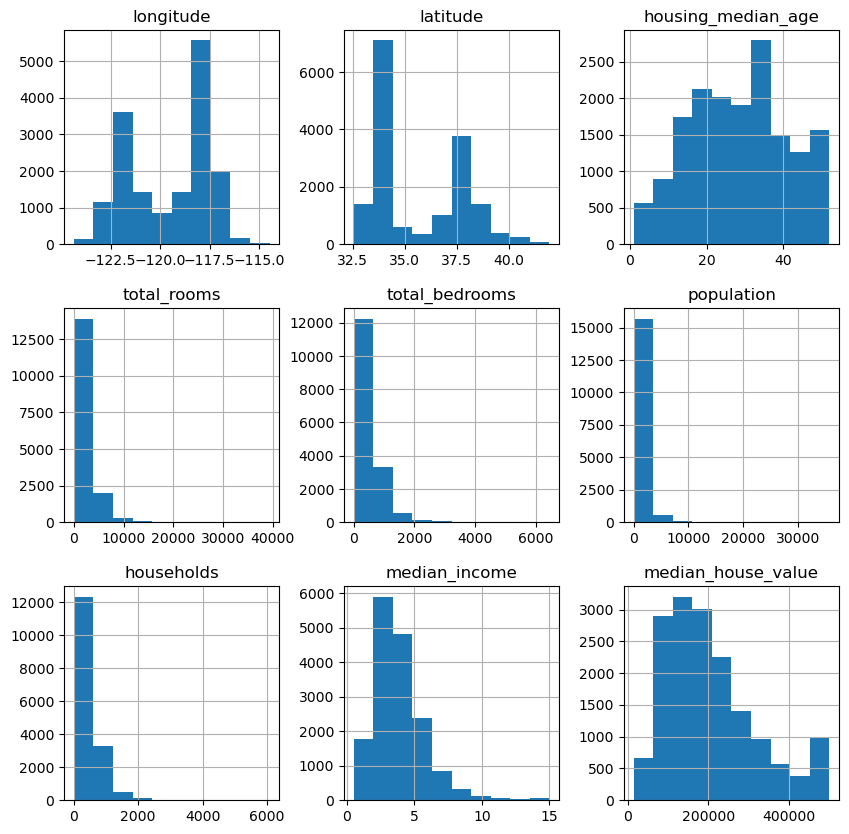

In [18]:
train_data.hist(figsize=(10,10));

In [19]:
# total_room , total_bedrooms, population, households, median_income these columns have somewhat normal distribution but it is skewed

In [20]:
train_data.corr(numeric_only=True)

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924340           -0.106111     0.040173   
latitude            -0.924340  1.000000            0.009535    -0.033439   
housing_median_age  -0.106111  0.009535            1.000000    -0.359714   
total_rooms          0.040173 -0.033439           -0.359714     1.000000   
total_bedrooms       0.066871 -0.066337           -0.319073     0.929102   
population           0.094641 -0.106192           -0.291689     0.851704   
households           0.054023 -0.071678           -0.301818     0.916829   
median_income       -0.021911 -0.073213           -0.120550     0.202131   
median_house_value  -0.048166 -0.141933            0.104041     0.136040   

                    total_bedrooms  population  households  median_income  \
longitude                 0.066871    0.094641    0.054023      -0.021911   
latitude                 -0.066337   -0.106192   -0.071678      -0.073213   
housing_median_age       -0.319073   -0.291689   -0.301818      -0.120550   
total_rooms               0.929102    0.851704    0.916829       0.202131   
total_bedrooms            1.000000    0.872241    0.978582      -0.005364   
population                0.872241    1.000000    0.903093       0.007224   
households                0.978582    0.903093    1.000000       0.016608   
median_income            -0.005364    0.007224    0.016608       1.000000   
median_house_value        0.051352   -0.023989    0.066598       0.688695   

                    median_house_value  
longitude                    -0.048166  
latitude                     -0.141933  
housing_median_age            0.104041  
total_rooms                   0.136040  
total_bedrooms                0.051352  
population                   -0.023989  
households                    0.066598  
median_income                 0.688695  
median_house_value            1.000000

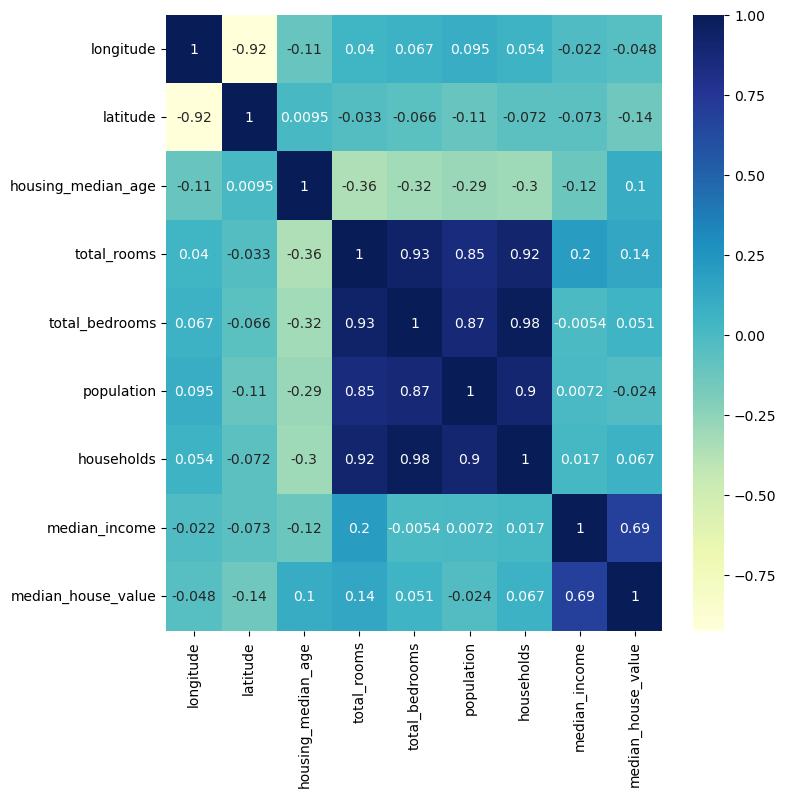

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu');

#### Kya samajh aaya

In [22]:
## Longitude aur latitude se kisi ko Loda farak nhi padta

In [23]:
## total_rooms, total_bedrooms, population, households, (median_income ka median_house_value se) kafi relation hai

#### target column ka baki ke saath kya relation hai?

In [24]:
## longitute aur latitude ke saath negative mein hai( agar chahe toh drop bhi kar sakte hai)

In [25]:
## median income aur target column ka aapas mein kafi relation hai

### Let's do some EDA on our own

In [26]:
train_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17727    -121.80     37.32                14.0       4412.0           924.0   
2057     -119.63     36.64                33.0       1036.0           181.0   
6453     -118.06     34.12                25.0       3891.0           848.0   
4619     -118.31     34.07                28.0       2362.0           949.0   
15266    -117.27     33.04                27.0       1839.0           392.0   
...          ...       ...                 ...          ...             ...   
11397    -117.97     33.72                24.0       2991.0           500.0   
12081    -117.54     33.76                 5.0       5846.0          1035.0   
5447     -118.42     34.01                42.0       1594.0           369.0   
866      -122.04     37.57                12.0       5719.0          1064.0   
15948    -122.43     37.73                52.0       3602.0           738.0   

       population  households  median_income ocean_proximity  \
17727      2698.0       891.0         4.7027       <1H OCEAN   
2057        620.0       174.0         3.4107          INLAND   
6453       1848.0       759.0         3.6639          INLAND   
4619       2759.0       894.0         2.2364       <1H OCEAN   
15266      1302.0       404.0         3.5500      NEAR OCEAN   
...           ...         ...            ...             ...   
11397      1437.0       453.0         5.4286       <1H OCEAN   
12081      3258.0      1001.0         4.7965       <1H OCEAN   
5447        952.0       362.0         3.0990       <1H OCEAN   
866        3436.0      1057.0         5.2879        NEAR BAY   
15948      2270.0       647.0         3.8934        NEAR BAY   

       median_house_value  
17727            227600.0  
2057             110400.0  
6453             248100.0  
4619             305600.0  
15266            214600.0  
...                   ...  
11397            273400.0  
12081            160800.0  
5447             335400.0  
866              231200.0  
15948            251800.0  

[16346 rows x 10 columns]

In [27]:
## Data samajhte hai ki BC hai kya isme
## apne pass ek location hai jiske longitude aur latitude given hai, us location ki kitni median_age hai, uss locatily mein kitne rooms hai, kitne bedrooms hai, 
## population kitni hai locality ki, ek ghar mein ya ek block mein kitne log rehte hai, waha ke logo ki median_income kitni hai, 
## vo location ocean ki kitne pass hai
## aur last mein uss location ki median_house_value kitni hai

In [28]:
import plotly.express as px

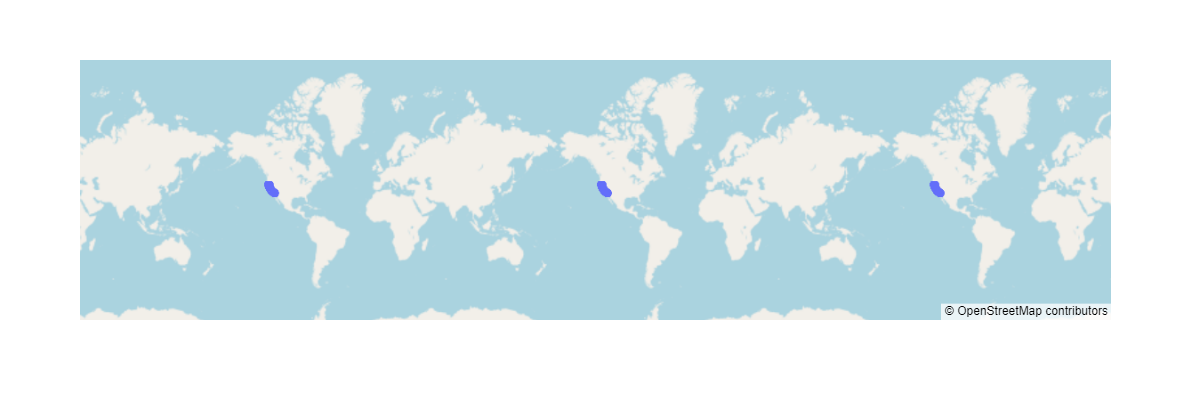

In [29]:
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude',
                        zoom=12, height=400, width=600)

fig.update_layout(mapbox_style='open-street-map')

fig.show();

## this is covering all of california

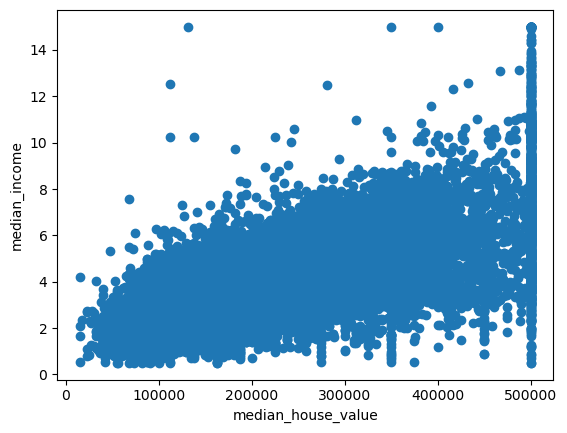

In [30]:
plt.scatter(x=df.median_house_value, y = df.median_income)
plt.xlabel('median_house_value')
plt.ylabel('median_income');

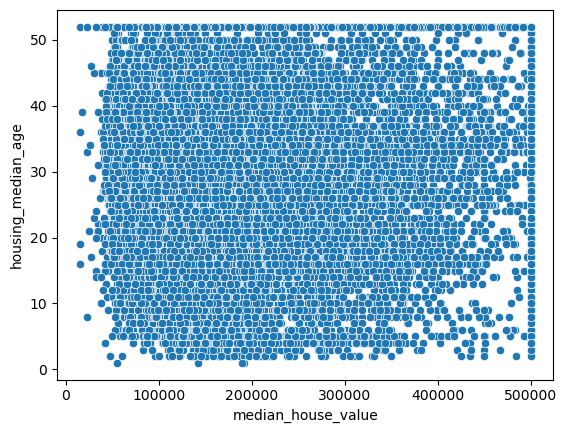

In [31]:
sns.scatterplot(df, x='median_house_value', y='housing_median_age');

In [32]:
numeric_columns = X_train.columns
numeric_columns = numeric_columns[0:-1]

In [33]:
numeric_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

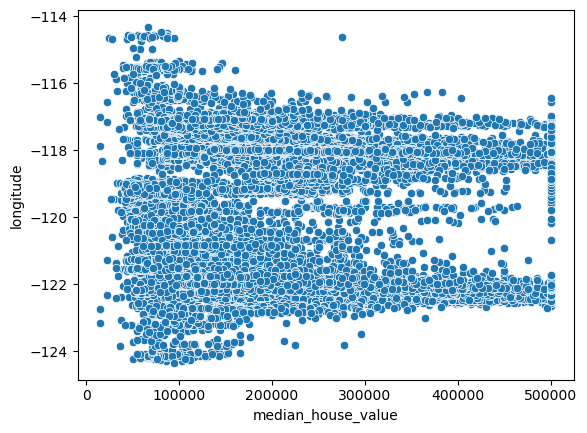

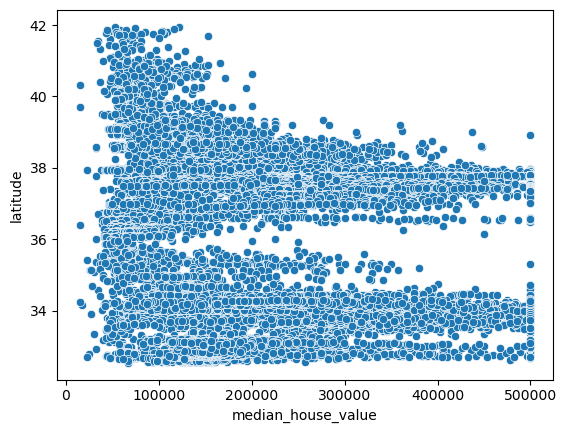

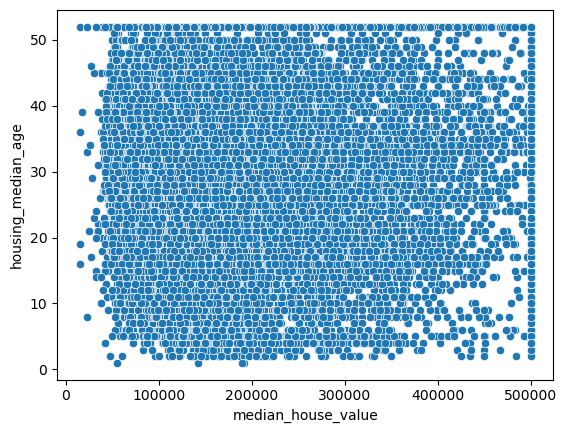

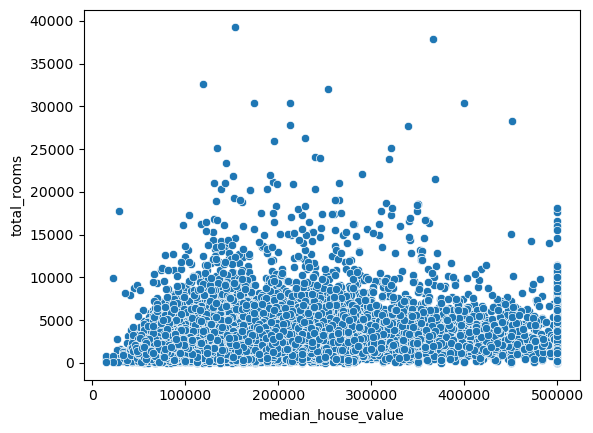

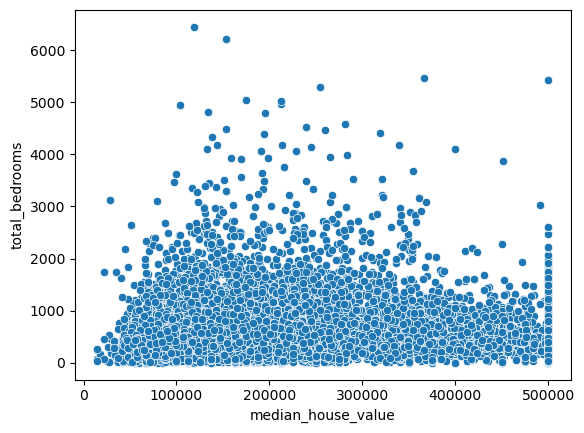

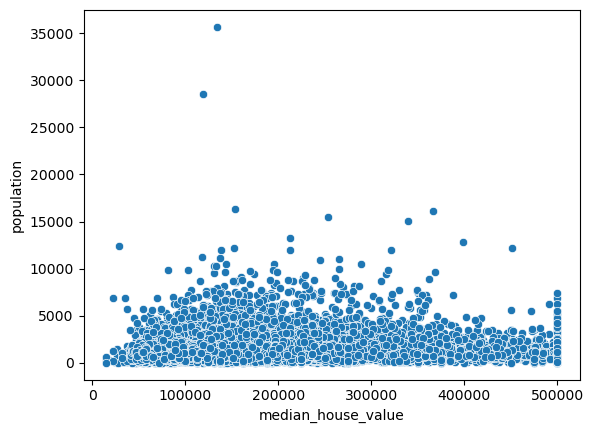

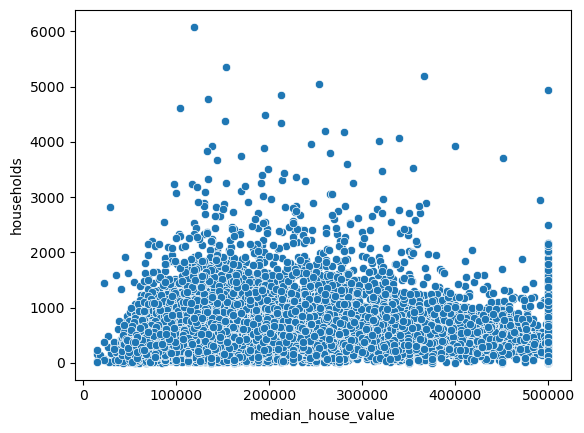

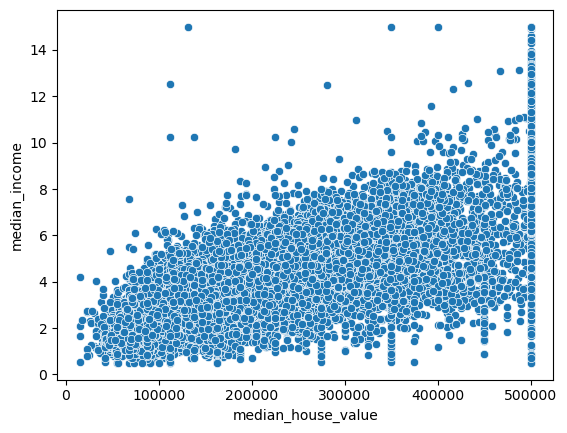

In [34]:
for i in numeric_columns:
    sns.scatterplot(df, x='median_house_value', y=i)
    plt.show()

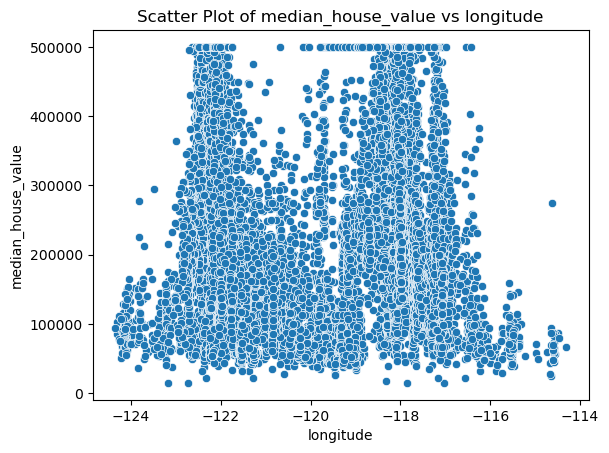

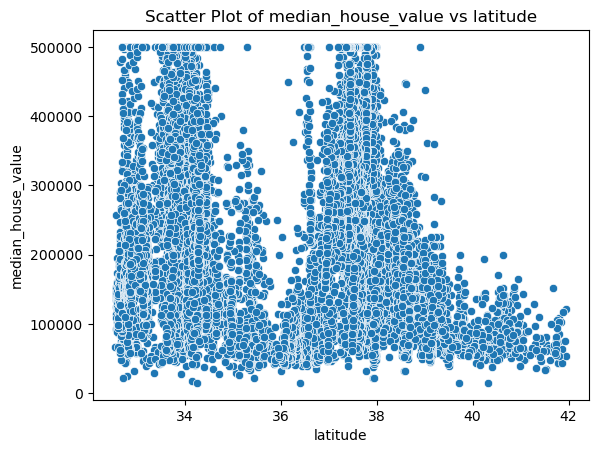

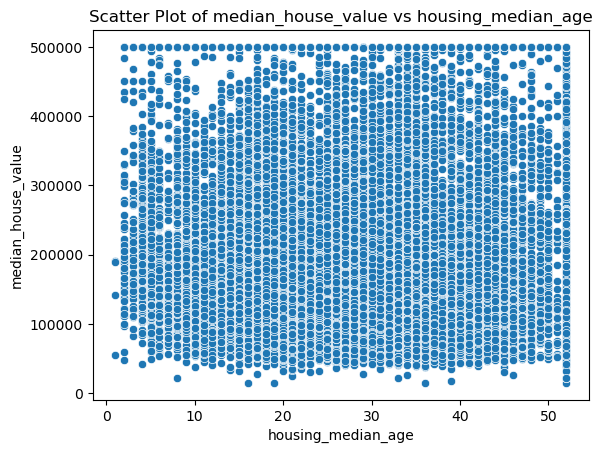

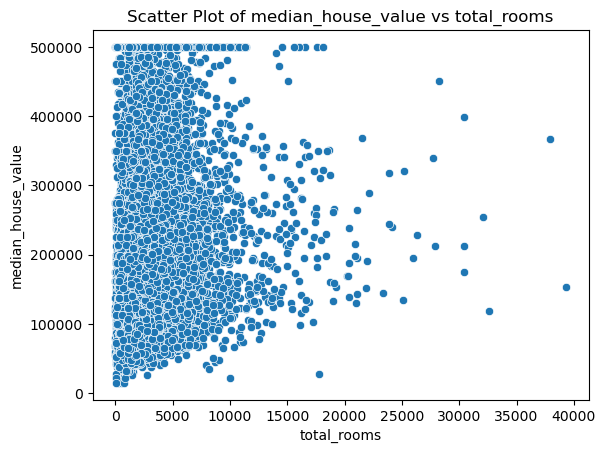

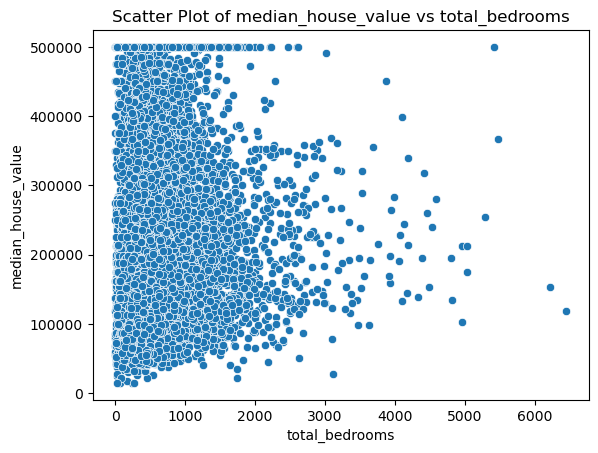

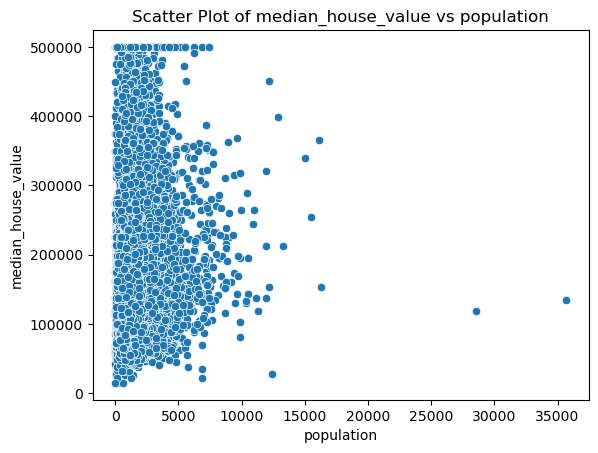

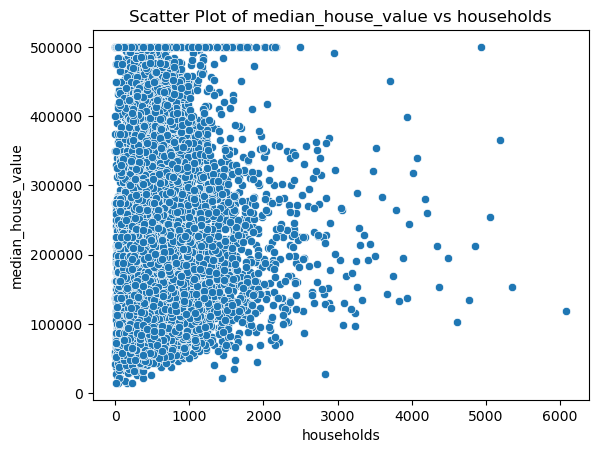

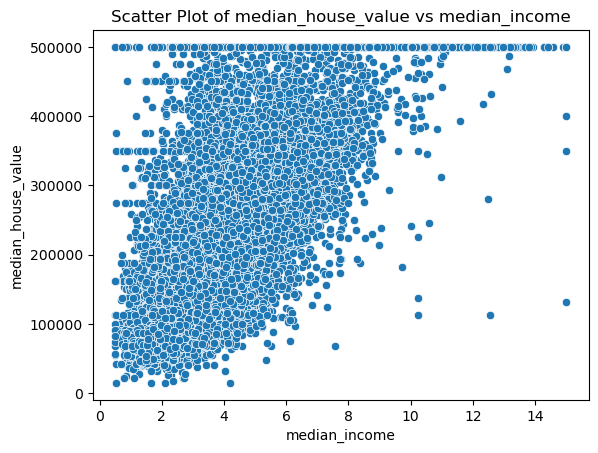

In [35]:
for column in numeric_columns:
    if column != 'median_house_value':
        sns.scatterplot(x=df[column], y=df['median_house_value'])
        plt.title(f'Scatter Plot of median_house_value vs {column}')
        plt.xlabel(column)
        plt.ylabel('median_house_value')
        plt.show()

In [36]:
## there are few columns which are right skewed and we wanted to see what is the distribution if we take log of those columns

### After taking a log of column it will deal with outliers, normalize the data, linear relationships

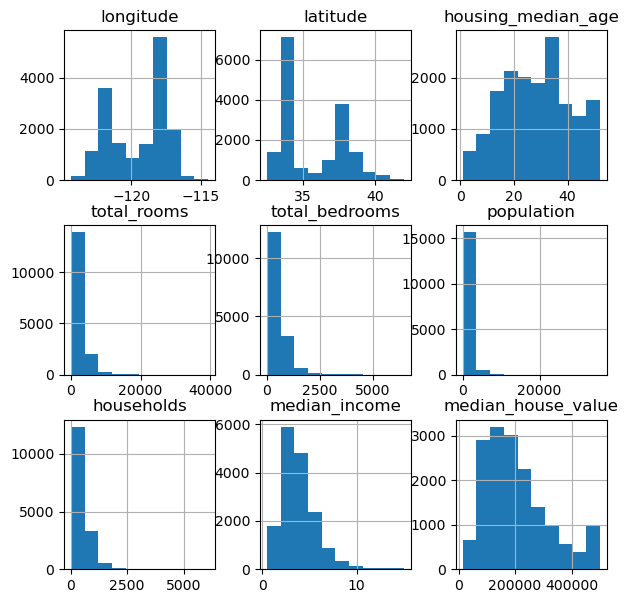

In [37]:
train_data.hist(figsize=(7,7));

In [38]:
train_data2 = train_data.copy()

In [39]:
train_data2['total_rooms'] = np.log(train_data2['total_rooms'] + 1)
train_data2['total_bedrooms'] = np.log(train_data2['total_bedrooms'] + 1)
train_data2['population'] = np.log(train_data2['population'] + 1)
train_data2['households'] = np.log(train_data2['households'] + 1)

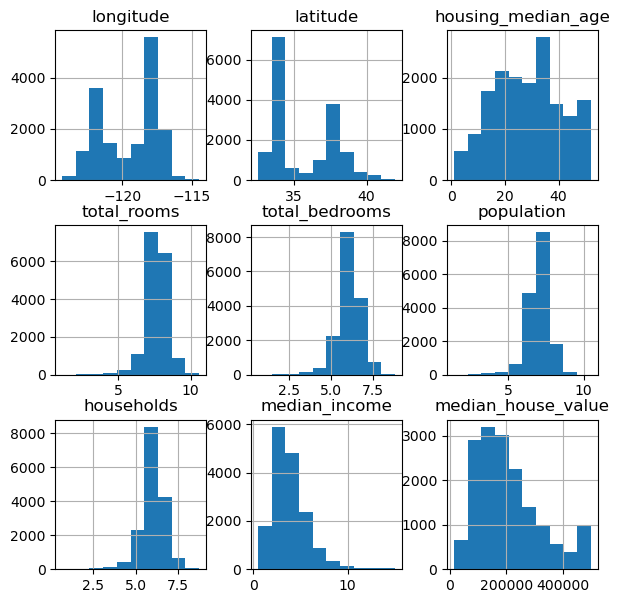

In [40]:
train_data2.hist(figsize=(7,7));

In [41]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

#### Now doing something between the categorical column and the target column

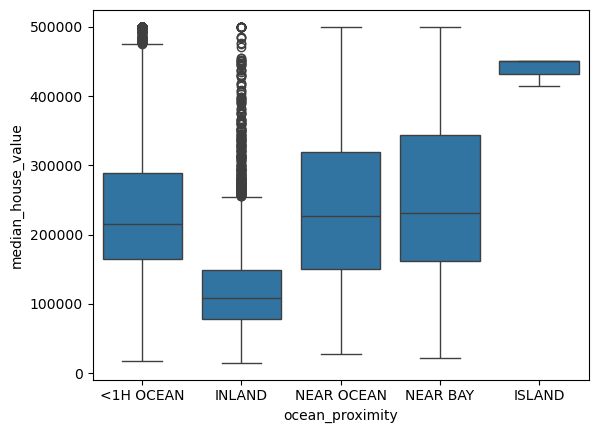

In [42]:
sns.boxplot(train_data, x='ocean_proximity', y='median_house_value');

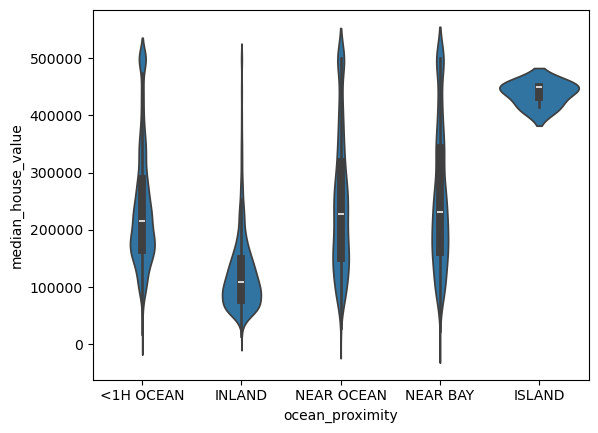

In [43]:
sns.violinplot(x='ocean_proximity', y='median_house_value', data=train_data);

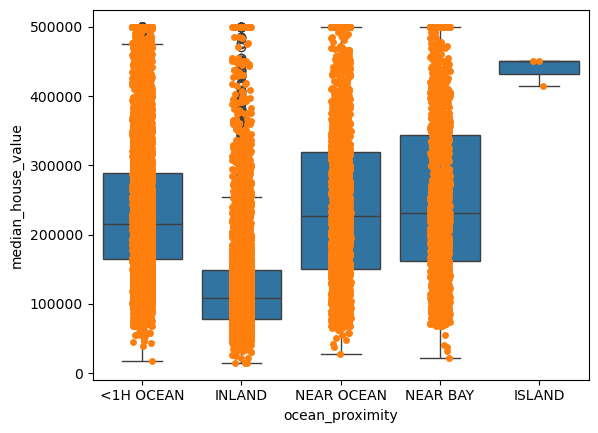

In [44]:
sns.boxplot(train_data, x='ocean_proximity', y='median_house_value');
sns.stripplot(train_data, x='ocean_proximity', y='median_house_value', jitter=True);

#### Now doing OneHotEncoding using pandas get_dummies

In [45]:
train_data2 = train_data2.join(pd.get_dummies(train_data2.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)
train_data2

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17727    -121.80     37.32                14.0     8.392310        6.829794   
2057     -119.63     36.64                33.0     6.944087        5.204007   
6453     -118.06     34.12                25.0     8.266678        6.744059   
4619     -118.31     34.07                28.0     7.767687        6.856462   
15266    -117.27     33.04                27.0     7.517521        5.973810   
...          ...       ...                 ...          ...             ...   
11397    -117.97     33.72                24.0     8.003697        6.216606   
12081    -117.54     33.76                 5.0     8.673684        6.943122   
5447     -118.42     34.01                42.0     7.374629        5.913503   
866      -122.04     37.57                12.0     8.651724        6.970730   
15948    -122.43     37.73                52.0     8.189522        6.605298   

       population  households  median_income  median_house_value  <1H OCEAN  \
17727    7.900637    6.793466         4.7027            227600.0          1   
2057     6.431331    5.164786         3.4107            110400.0          0   
6453     7.522400    6.633318         3.6639            248100.0          0   
4619     7.922986    6.796824         2.2364            305600.0          1   
15266    7.172425    6.003887         3.5500            214600.0          0   
...           ...         ...            ...                 ...        ...   
11397    7.271009    6.118097         5.4286            273400.0          1   
12081    8.089176    6.909753         4.7965            160800.0          1   
5447     6.859615    5.894403         3.0990            335400.0          1   
866      8.142354    6.964136         5.2879            231200.0          0   
15948    7.727976    6.473891         3.8934            251800.0          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
17727       0       0         0           0  
2057        1       0         0           0  
6453        1       0         0           0  
4619        0       0         0           0  
15266       0       0         0           1  
...       ...     ...       ...         ...  
11397       0       0         0           0  
12081       0       0         0           0  
5447        0       0         0           0  
866         0       0         1           0  
15948       0       0         1           0  

[16346 rows x 14 columns]

In [46]:
## Now we will find the relation of newly created column with other columns

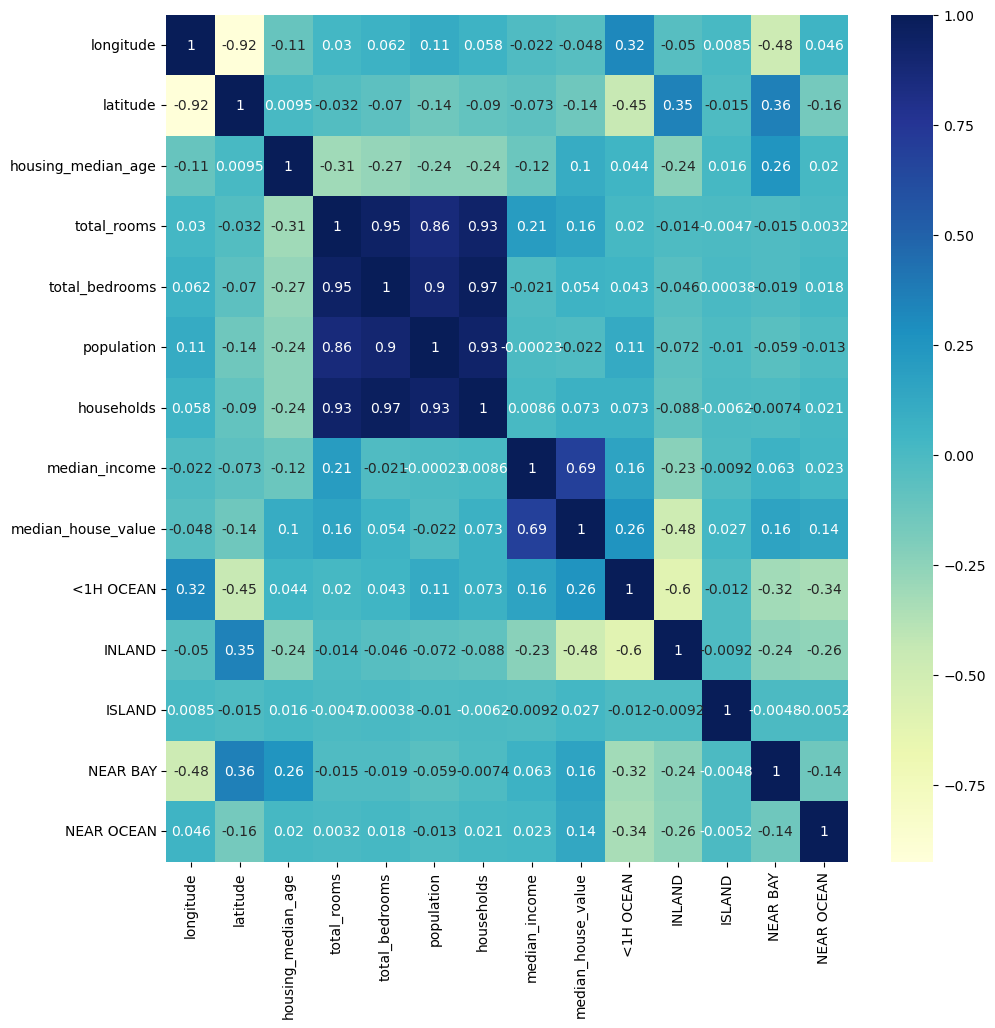

In [47]:
plt.figure(figsize=(11,11))
sns.heatmap(train_data2.corr(), annot=True, cmap='YlGnBu');

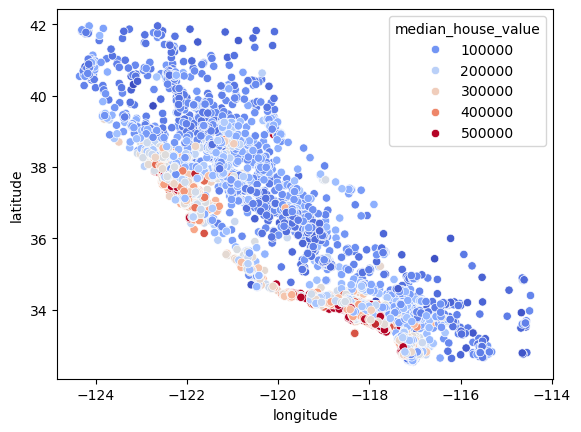

In [48]:
sns.scatterplot(x='longitude', y='latitude', data=train_data, hue='median_house_value', palette='coolwarm');

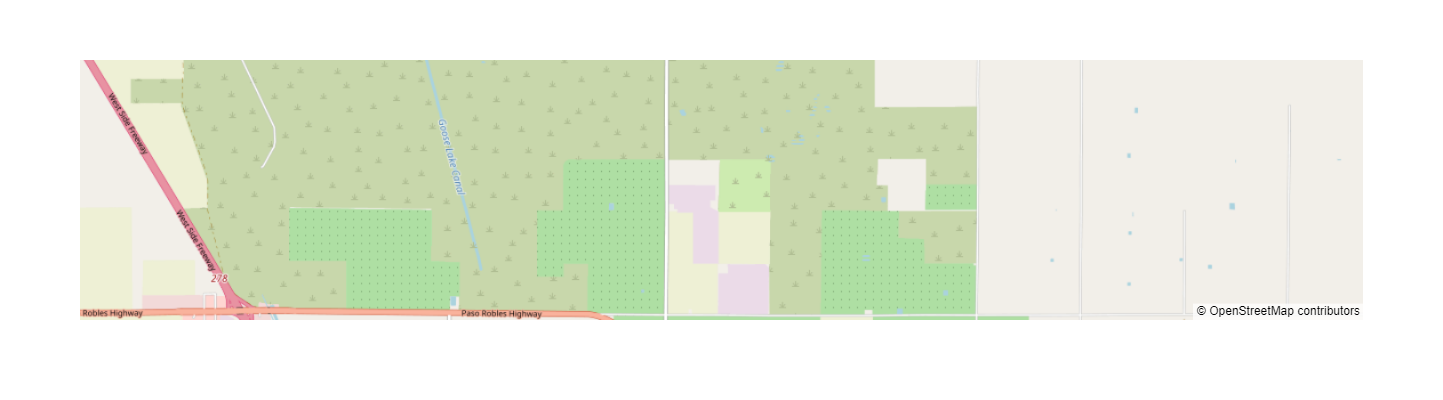

In [49]:
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude',
                        zoom=12, height=400, width=600)

fig.update_layout(mapbox_style='open-street-map')

fig.show();

## this is covering all of california

In [50]:
# Now let's just apply algoritm and see what is the performance

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
X_train, y_train = train_data2.drop(['median_house_value'], axis=1), train_data2['median_house_value']

In [53]:
# but first lets make all the columns values within a range or in simple words first let's apply standardization or normalization

In [54]:
train_data2.median_income.describe()

count    16346.000000
mean         3.870697
std          1.897825
min          0.499900
25%          2.564550
50%          3.536650
75%          4.750000
max         15.000100
Name: median_income, dtype: float64

In [55]:
# as there is no need for Standarization cause most of the columns values are small and within a range

In [56]:
train_data2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [57]:
X_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17727    -121.80     37.32                14.0     8.392310        6.829794   
2057     -119.63     36.64                33.0     6.944087        5.204007   
6453     -118.06     34.12                25.0     8.266678        6.744059   
4619     -118.31     34.07                28.0     7.767687        6.856462   
15266    -117.27     33.04                27.0     7.517521        5.973810   
...          ...       ...                 ...          ...             ...   
11397    -117.97     33.72                24.0     8.003697        6.216606   
12081    -117.54     33.76                 5.0     8.673684        6.943122   
5447     -118.42     34.01                42.0     7.374629        5.913503   
866      -122.04     37.57                12.0     8.651724        6.970730   
15948    -122.43     37.73                52.0     8.189522        6.605298   

       population  households  median_income  <1H OCEAN  INLAND  ISLAND  \
17727    7.900637    6.793466         4.7027          1       0       0   
2057     6.431331    5.164786         3.4107          0       1       0   
6453     7.522400    6.633318         3.6639          0       1       0   
4619     7.922986    6.796824         2.2364          1       0       0   
15266    7.172425    6.003887         3.5500          0       0       0   
...           ...         ...            ...        ...     ...     ...   
11397    7.271009    6.118097         5.4286          1       0       0   
12081    8.089176    6.909753         4.7965          1       0       0   
5447     6.859615    5.894403         3.0990          1       0       0   
866      8.142354    6.964136         5.2879          0       0       0   
15948    7.727976    6.473891         3.8934          0       0       0   

       NEAR BAY  NEAR OCEAN  
17727         0           0  
2057          0           0  
6453          0           0  
4619          0           0  
15266         0           1  
...         ...         ...  
11397         0           0  
12081         0           0  
5447          0           0  
866           1           0  
15948         1           0  

[16346 rows x 13 columns]

### Using LinearRegression

In [58]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [59]:
reg.intercept_, reg.coef_

(-2332272.4061910026,
 array([-29614.44322808, -28752.29759293,   1051.50522178, -49891.29939747,
         98653.10813812, -89624.80637325,  46736.7035979 ,  42565.48596577,
        -27731.15956149, -60043.0154519 , 154833.64755363, -36954.07933176,
        -30105.39320848]))

In [60]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [61]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data.median_house_value

In [62]:
## now let's find  out the accuracy of our model

In [63]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [106]:
print('r2_score is:',r2_score(y_test, reg.predict(X_test)))

r2_score is: 0.6683603521371762


In [65]:
mean_absolute_error(y_test, reg.predict(X_test))

48651.63024778215

In [66]:
mean_squared_error(y_test, reg.predict(X_test))

4535232140.345644

### Now using SGDRegressor

In [67]:
from sklearn.linear_model import SGDRegressor

In [68]:
sgd = SGDRegressor()

In [69]:
sgd.fit(X_train, y_train)

SGDRegressor()

In [70]:
sgd.intercept_, sgd.coef_

(array([4.14824129e+08]),
 array([-5.71121069e+09,  2.30052375e+10, -1.27579375e+10,  3.27214090e+09,
        -7.50769177e+08,  7.66859555e+09, -9.08400927e+09, -1.54447185e+10,
         1.15097391e+10, -1.72900831e+10, -9.01804187e+09, -2.09165944e+10,
         3.62667895e+10]))

In [107]:
print('r2_score is:',r2_score(y_test, sgd.predict(X_test)))

r2_score is: -90167270376310.06


In [72]:
mean_absolute_error(y_test, reg.predict(X_test))

48651.63024778215

In [73]:
mean_squared_error(y_test, reg.predict(X_test))

4535232140.345644

### Now doing it with Mini Batch Gradient Descent

In [74]:
sgd2 = SGDRegressor(learning_rate='constant', eta0=.1)

In [75]:
import random

In [76]:
batch = 35

for i in range(100):
    idx = np.random.choice(X_train.index, batch)
    sgd2.partial_fit(X_train.loc[idx], y_train[idx])
    

In [77]:
sgd2

SGDRegressor(eta0=0.1, learning_rate='constant')

In [78]:
sgd2.intercept_, sgd2.coef_

(array([-1.69111189e+11]),
 array([ 1.24610135e+13,  2.62971688e+12,  1.27525297e+13, -3.52396273e+12,
        -3.20424379e+12, -1.37888774e+12, -2.27217374e+12, -6.17834543e+11,
         1.03027671e+12,  3.86670800e+11,  9.79581242e+10,  2.55295251e+12,
        -4.23631329e+12]))

In [108]:
print('r2_score is:',r2_score(y_test, sgd.predict(X_test)))

r2_score is: -90167270376310.06


In [80]:
mean_absolute_error(y_test, sgd.predict(X_test)), mean_squared_error(y_test, sgd.predict(X_test))

(1097827904688.4573, 1.2330537233805866e+24)

### Now doing it with Ridge Regression

In [81]:
from sklearn.linear_model import Ridge

In [82]:
rid = Ridge(alpha=0.5)

In [83]:
rid.fit(X_train, y_train)

Ridge(alpha=0.5)

In [84]:
rid.intercept_, rid.coef_

(-2338121.024187444,
 array([-29628.94470383, -28770.9042813 ,   1051.84304913, -49729.90774228,
         98529.02317556, -89591.55033329,  46664.9802247 ,  42548.02629032,
        -23179.24217092, -55486.03076777, 136604.34246058, -32386.44466952,
        -25552.62485409]))

In [109]:
print('r2_score is:',r2_score(y_test, rid.predict(X_test)))

r2_score is: 0.6685860787081406


#### Here using GridSearchCV to find the best parameter for RidgeRegression

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
rid1 = Ridge()

In [88]:
alpha = list(np.logspace(-6,6,13))
alpha

[1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1.0,
 10.0,
 100.0,
 1000.0,
 10000.0,
 100000.0,
 1000000.0]

In [89]:
param_grids = {'alpha':alpha}
print(param_grids)

{'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0]}


In [90]:
clf = GridSearchCV(estimator=rid1,
                  param_grid=param_grids, 
                  cv=5, 
                  verbose=2, 
                  n_jobs=-1)

clf

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0,
                                   10.0, 100.0, 1000.0, 10000.0, 100000.0,
                                   1000000.0]},
             verbose=2)

In [91]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0,
                                   10.0, 100.0, 1000.0, 10000.0, 100000.0,
                                   1000000.0]},
             verbose=2)

In [92]:
clf.best_params_

{'alpha': 0.1}

In [93]:
alpha2 = [.05, .1, .2, .3, .4, .5]

param_grids2 = {'alpha':alpha2}

rid2 = Ridge()

clf2 = GridSearchCV(estimator=rid2,
                  param_grid=param_grids2, 
                  cv=5, 
                  verbose=2, 
                  n_jobs=-1)

clf2.fit(X_train, y_train)

clf2.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'alpha': 0.3}

In [94]:
rid3 = Ridge(alpha=.3)

rid3.fit(X_train, y_train)

r2_score(y_test, rid3.predict(X_test))

0.6685067789273756

In [95]:
# It made no difference

### Now doing it with RidgeCV()

In [96]:
from sklearn.linear_model import RidgeCV

In [97]:
a = np.logspace(-4,4,50)

In [98]:
rid_cv = RidgeCV(alphas=a, store_cv_values=True)

In [99]:
rid_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68269580e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
        store_cv_values=True)

In [100]:
rid_cv.alpha_

0.040949150623804234

In [101]:
r2_score(y_test, rid_cv.predict(X_test))

0.6683826165859705

### Now doing it with Lasso Regression

In [102]:
from sklearn.linear_model import Lasso, LassoCV

In [103]:
las_cv = LassoCV(alphas=a, max_iter=1000)

las_cv.fit(X_train, y_train)

r2_score(y_test, las_cv.predict(X_test))

C:\Users\PK419HT\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.217e+12, tolerance: 2.164e+10



0.6685015325253378

### Now doing it with Polynomial Regression

In [104]:
from sklearn.preprocessing import PolynomialFeatures

In [105]:
b = [i for i in range(1,5)]


for i in b:
    poly = PolynomialFeatures(degree=i, include_bias=True)
    
    X_train_tran = poly.fit_transform(X_train)
    X_test_tran = poly.transform(X_test)
    
    
    lr3 = LinearRegression()
    
    lr3.fit(X_train_tran, y_train)
    
    
    print(i, 'r2_score is:', r2_score(y_test, lr3.predict(X_test_tran)))

1 r2_score is: 0.6683603521371781
2 r2_score is: 0.7401082897893778
3 r2_score is: 0.5076351872360088
4 r2_score is: -121968.85349140025


### Now doing it with RandomForest

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rf = RandomForestRegressor()

In [115]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [116]:
r2_score(y_test, rf.predict(X_test))

0.8263523282570127

#### 0.82 is the highest r2_score so far

#### Now let's optimize random forest and use gridSearchCV to find the best parameters for our algorithm

In [121]:
param = {
        'n_estimators':[3, 10, 30],
        'max_features':[2, 4, 6, 8]
}

rf2 = RandomForestRegressor()
grid2 = GridSearchCV(rf2, param, cv=5,
                    scoring='neg_mean_squared_error',
                    return_train_score=True)


# grid2.fit(X_train, y_train)

In [122]:
grid2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [126]:
grid2.best_params_

{'max_features': 6, 'n_estimators': 30}

In [127]:
print("r2_score is:",r2_score(y_test, grid2.predict(X_test)))

r2_score is: 0.8259891187298841


#### this is performing bad then the default one

### Now doing it for one last time with ElasticRegression to see whether it is performing better than ridge and lasso regression

In [130]:
from sklearn.linear_model import ElasticNet

In [131]:
en = ElasticNet(alpha=0.05,l1_ratio=0.9)

In [132]:
en.fit(X_train, y_train)

ElasticNet(alpha=0.05, l1_ratio=0.9)

In [133]:
r2_score(y_test, en.predict(X_test))

0.6680793319019467

### Just one more time with ElasticNetCV to check the r2_score

In [134]:
from sklearn.linear_model import ElasticNetCV

In [136]:
ratios = [0, 1, 0.01]
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]



In [137]:
en2 = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv = 5, n_jobs=-1)

In [138]:
en2.fit(X_train, y_train)

C:\Users\PK419HT\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.

C:\Users\PK419HT\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.

C:\Users\PK419HT\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 85182358645821.92, tolerance: 17488487085.07982

C:\Users\PK419HT\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterat

ElasticNetCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 10.0, 100.0],
             cv=5, l1_ratio=[0, 1, 0.01], n_jobs=-1)

In [139]:
r2_score(y_test, en2.predict(X_test))

0.6684627740879467

In [140]:
en2.get_params

<bound method BaseEstimator.get_params of ElasticNetCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 10.0, 100.0],
             cv=5, l1_ratio=[0, 1, 0.01], n_jobs=-1)>

In [144]:
en2.alpha_, en2.l1_ratio_

(1e-05, 0.0)